In [1]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Convolution2D,Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from keras import optimizers
from keras.models import Model,load_model

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import glob

root_path = '/content/drive/My Drive/Smart Health/Assignment_3/DS/'
data_X = []
data_Y = []

for name in glob.glob(root_path+'*'):
  tmp_class_num = None
  if 'Abdomen' in name:
    tmp_class_num = 0
  elif 'Head' in name:
    tmp_class_num = 1
      # print "Not found!"
  elif 'Chest' in name:
    tmp_class_num = 2    
  each_file_path = name
  img_arr = cv2.imread(each_file_path, cv2.IMREAD_GRAYSCALE)
  resized_arr = cv2.resize(img_arr, (32, 32))
  data_X.append(resized_arr)
  data_Y.append(tmp_class_num)


In [5]:
print(type(data_X), len(data_X), len(data_X[0]), len(data_X[1]))
data_X = np.array(data_X)
data_Y = np.array(data_Y)


<class 'list'> 1500 32 32


In [7]:
print(data_X.shape,"   ",data_Y.shape)
data_X[0]

(1500, 32, 32)     (1500,)


array([[101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101],
       ...,
       [101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101]], dtype=uint8)

In [8]:
data_X[1]

array([[126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       ...,
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126]], dtype=uint8)

In [9]:
data_X = data_X / 255

In [10]:
data_X[0]

array([[0.39607843, 0.39607843, 0.39607843, ..., 0.39607843, 0.39607843,
        0.39607843],
       [0.39607843, 0.39607843, 0.39607843, ..., 0.39607843, 0.39607843,
        0.39607843],
       [0.39607843, 0.39607843, 0.39607843, ..., 0.39607843, 0.39607843,
        0.39607843],
       ...,
       [0.39607843, 0.39607843, 0.39607843, ..., 0.39607843, 0.39607843,
        0.39607843],
       [0.39607843, 0.39607843, 0.39607843, ..., 0.39607843, 0.39607843,
        0.39607843],
       [0.39607843, 0.39607843, 0.39607843, ..., 0.39607843, 0.39607843,
        0.39607843]])

In [11]:
data_X[1]

array([[0.49411765, 0.49411765, 0.49411765, ..., 0.49411765, 0.49411765,
        0.49411765],
       [0.49411765, 0.49411765, 0.49411765, ..., 0.49411765, 0.49411765,
        0.49411765],
       [0.49411765, 0.49411765, 0.49411765, ..., 0.49411765, 0.49411765,
        0.49411765],
       ...,
       [0.49411765, 0.49411765, 0.49411765, ..., 0.49411765, 0.49411765,
        0.49411765],
       [0.49411765, 0.49411765, 0.49411765, ..., 0.49411765, 0.49411765,
        0.49411765],
       [0.49411765, 0.49411765, 0.49411765, ..., 0.49411765, 0.49411765,
        0.49411765]])

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=42)

In [13]:
c_a = 0
c_b = 0
c_c = 0
for i in Y_train:
  if i==0:
    c_a = c_a +1
  
  if i==1:
    c_b = c_b +1
  
  if i==2:
    c_c = c_c +1

In [14]:
print(c_a,"   ",c_b,"  ",c_c)

339     359    352


Text(0.5, 1.0, '0')

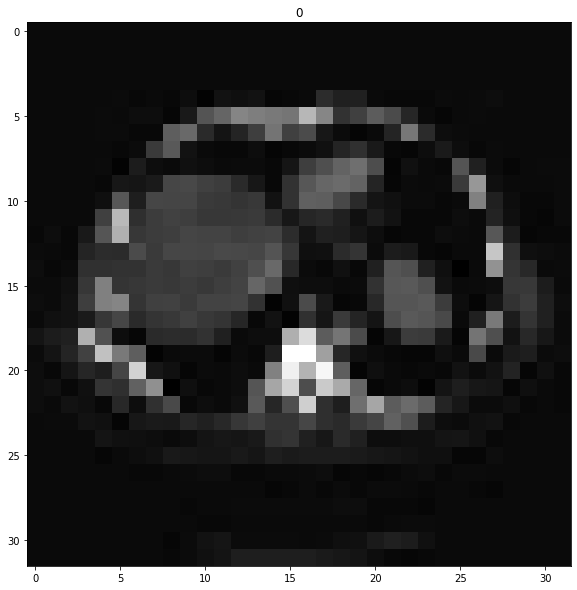

In [15]:
plt.figure(figsize = (10, 10))
plt.imshow(data_X[0], cmap='gray')
plt.title(data_Y[0])

In [16]:
activationFunction = 'relu'
def getModel():
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = (5, 5), activation=activationFunction, input_shape=(32, 32, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(48, kernel_size=(3,3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(20, kernel_size=(3,3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    
    model.add(Flatten())
    model.add(Dense(100, activation=activationFunction, name ='feature_dense'))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

model_train = getModel()
# model_test = getModel()

In [17]:
def showResults(test, pred):
    target_names = ['A', 'C', 'H']
    print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(test, pred)
    print(cm)

In [18]:
X_train = np.expand_dims(X_train, axis = 3)
X_test = np.expand_dims(X_test, axis = 3)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
epoch_num = 7

(1050, 32, 32, 1) (450, 32, 32, 1) (1050,) (450,)


In [19]:
# y_train_cat = to_categorical(Y_train)
# y_test_cat = to_categorical(Y_test)

In [20]:
history_train = model_train.fit(X_train, Y_train, 
                    epochs=epoch_num, 
                    batch_size = 64)  

Epoch 1/7
17/17 [==============================] - 0s 14ms/step - loss: 1.0000 - accuracy: 0.5505
Epoch 2/7
17/17 [==============================] - 0s 8ms/step - loss: 0.4641 - accuracy: 0.8400
Epoch 3/7
17/17 [==============================] - 0s 7ms/step - loss: 0.2109 - accuracy: 0.9219
Epoch 4/7
17/17 [==============================] - 0s 8ms/step - loss: 0.0957 - accuracy: 0.9724
Epoch 5/7
17/17 [==============================] - 0s 7ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 6/7
17/17 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9933
Epoch 7/7
17/17 [==============================] - 0s 7ms/step - loss: 0.0213 - accuracy: 0.9952


In [21]:
intermediate_layer_train = Model(inputs=model_train.input,
                                 outputs=model_train.get_layer('feature_dense').output)

intermediate_layer_train.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 48)        27696     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 48)         

In [22]:
XTrainFeature = intermediate_layer_train.predict(X_train)
XTestFeature = intermediate_layer_train.predict(X_test)

In [23]:
print(XTestFeature.shape,"   ",XTrainFeature.shape)

(450, 100)     (1050, 100)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier()
k_range = [3, 5, 7, 9]
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(neigh, param_grid, cv=5, scoring='accuracy')

In [25]:
grid.fit(XTrainFeature, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [26]:
grid.best_params_

{'n_neighbors': 3}

In [27]:
grid.cv_results_

{'mean_fit_time': array([0.00638342, 0.00605078, 0.00557809, 0.00596685]),
 'mean_score_time': array([0.01767187, 0.01874113, 0.01578426, 0.01744852]),
 'mean_test_score': array([1.        , 1.        , 1.        , 0.99904762]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9}],
 'rank_test_score': array([1, 1, 1, 4], dtype=int32),
 'split0_test_score': array([1., 1., 1., 1.]),
 'split1_test_score': array([1., 1., 1., 1.]),
 'split2_test_score': array([1., 1., 1., 1.]),
 'split3_test_score': array([1., 1., 1., 1.]),
 'split4_test_score': array([1.       , 1.       , 1.       , 0.9952381]),
 'std_fit_time': array([0.00138129, 0.00085538, 0.00041063, 0.00086082]),
 'std_score_time': array([0.0017046 , 0.00215205, 0.00030051, 0.00181189]),
 'std_test_score': array([0.        , 0.        , 

In [28]:
import pickle
pkl_knn = "/content/drive/My Drive/Smart Health/publicID-KNN.pkl"
pkl_rf = "/content/drive/My Drive/Smart Health/publicID-RF.pkl"
with open(pkl_knn, 'wb') as file:
  pickle.dump(grid, file)

In [29]:
with open(pkl_knn, 'rb') as file:
  grid1 = pickle.load(file)
x = grid1.predict(XTestFeature)
showResults(Y_test, x)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       161
           C       1.00      1.00      1.00       141
           H       1.00      1.00      1.00       148

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

Accuracy  : 1.0
Precision : 1.0
f1Score : 1.0
[[161   0   0]
 [  0 141   0]
 [  0   0 148]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [31]:
rf_model = RandomForestClassifier()

In [32]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)],
               'max_depth': [int(x) for x in np.linspace(5, 25, num = 5)],
               'bootstrap': [True, False]
               }

In [33]:
rf_random = RandomizedSearchCV(estimator =rf_model, 
                               param_distributions = random_grid, 
                               n_iter = 25, cv = 5)
# Fit the random search model
rf_random.fit(XTrainFeature, Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [34]:
rf_random.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 83}

In [35]:
with open(pkl_rf, 'wb') as file:
  pickle.dump(rf_random, file)

In [36]:
with open(pkl_rf, 'rb') as file:
  rf_random1 = pickle.load(file)
predictions = rf_random1.predict(XTestFeature)
showResults(Y_test, predictions)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       161
           C       1.00      1.00      1.00       141
           H       1.00      1.00      1.00       148

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

Accuracy  : 1.0
Precision : 1.0
f1Score : 1.0
[[161   0   0]
 [  0 141   0]
 [  0   0 148]]
